# **Decision Tree Handson**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

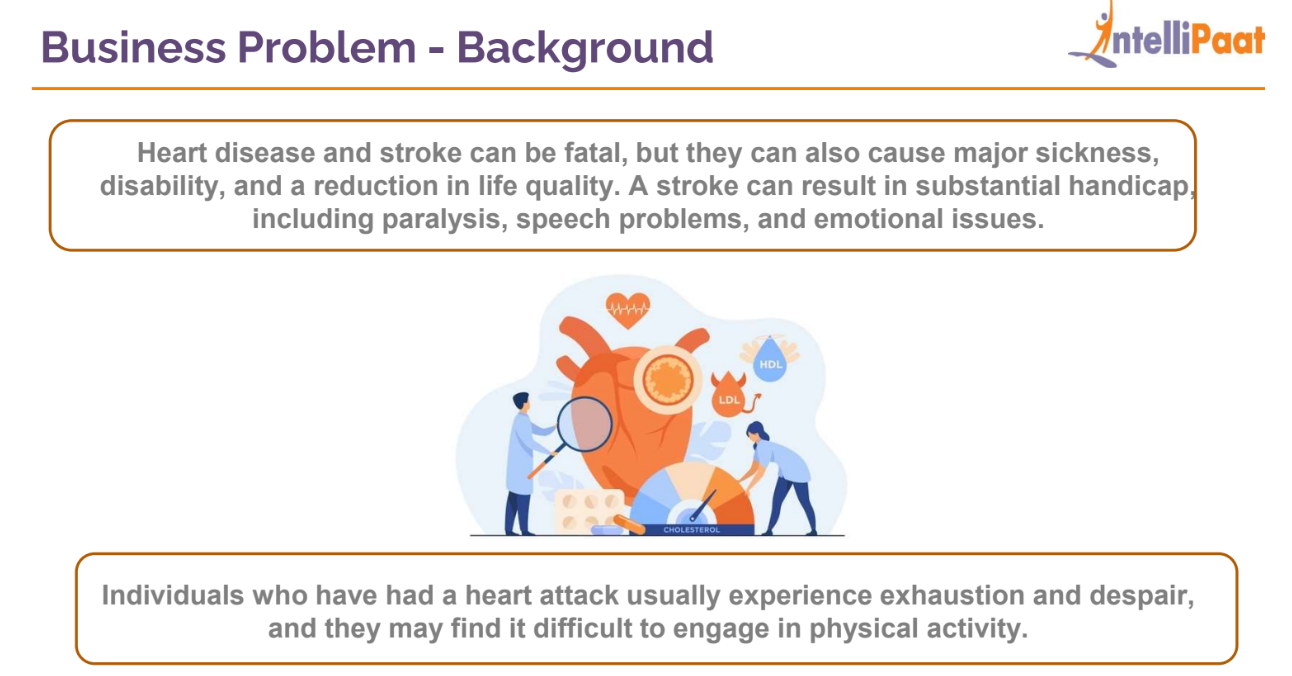

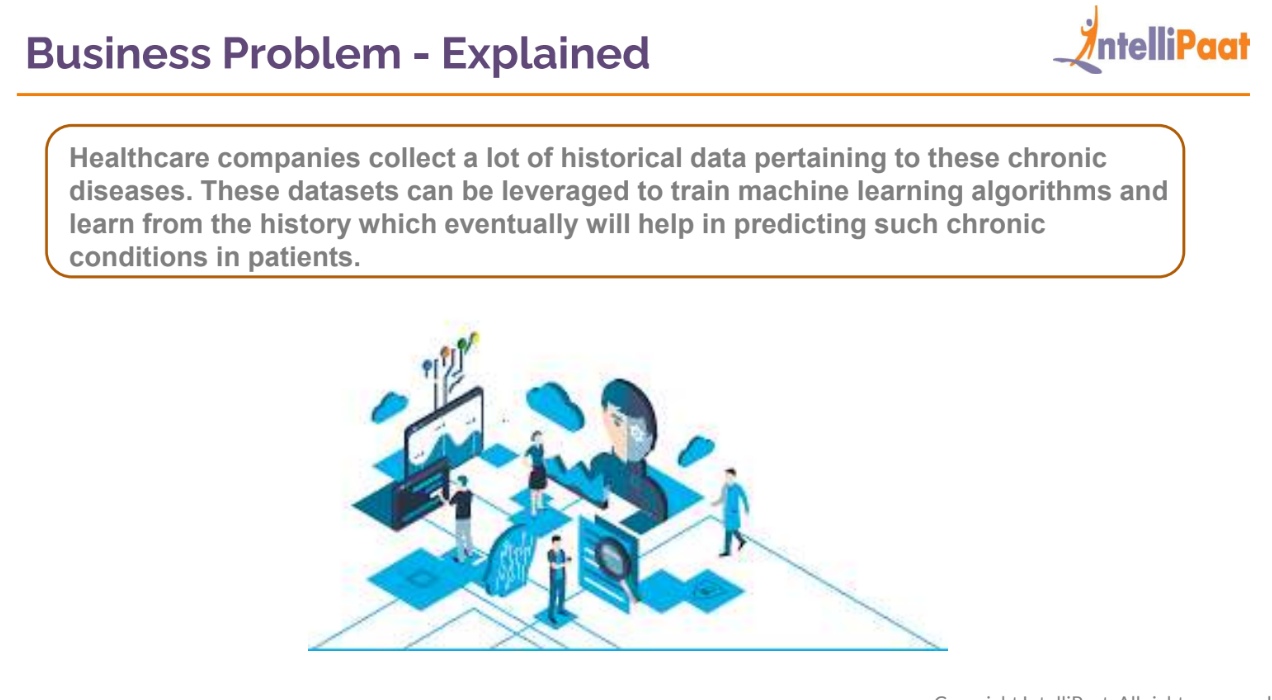

In [ ]:
df=pd.read_csv('heart.csv')  # Already label Encoded data

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# age: Age of the patient (in years).
# sex: Gender of the patient (0 = female, 1 = male).
# cp: Chest pain type (categorical variable):
# 0: Typical angina
# 1: Atypical angina
# 2: Non-anginal pain
# 3: Asymptomatic
# trestbps: Resting blood pressure (in mm Hg on admission to the hospital).
# chol: Serum cholesterol level (in mg/dL).
# fbs: Fasting blood sugar > 120 mg/dL (1 = true; 0 = false).
# restecg: Resting electrocardiographic results (categorical):
# 0: Normal
# 1: Having ST-T wave abnormality (e.g., T wave inversions and/or ST elevation or depression of >0.05 mV)
# 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria.
# thalach: Maximum heart rate achieved.
# exang: Exercise-induced angina (1 = yes; 0 = no).
# oldpeak: ST depression induced by exercise relative to rest (numeric).
# slope: The slope of the peak exercise ST segment:
# 0: Upsloping
# 1: Flat
# 2: Downsloping
# ca: Number of major vessels (0–3) colored by fluoroscopy.
# thal: Thalassemia (categorical):
# 0: Normal
# 1: Fixed defect
# 2: Reversible defect
# target: Presence of heart disease (binary):
# 0: No heart disease
# 1: Heart disease present

In [ ]:
#Data Cleaning


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# checking the duplicate values
df.duplicated().sum()

1

In [ ]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Outliers - Tree algorithms don't get affected by outliers

In [ ]:
#  label Encoding  --  Already done in the dataset

In [ ]:
# Feature Selection:
# VIF- check the multicolinearity, that is not the problem in the Tree algorithms
# we can go ahed with other feature selection Techniques
# corelation
# RFE -Recursive feature Elimination
# In the Given dataset I will not Go ahead with any of the FS technique as it already have less feature and all have significance in medical Terms

In [ ]:
# Split the data into independent and dependent
X=df.drop('target',axis=1)
y=df['target']

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
# Split the data into traing and Testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=45)

In [ ]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2


In [ ]:
y_train

,target
84,1
270,0
89,1
40,1
130,1
...,...
163,1
214,0
95,1
32,1


In [ ]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2
80,41,1,2,112,250,0,1,179,0,0.0,2,0,2
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3
138,57,1,0,110,201,0,1,126,1,1.5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2
200,44,1,0,110,197,0,0,177,0,0.0,2,1,2
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3


In [ ]:
y_test

,target
165,0
99,1
80,1
113,1
138,1
...,...
102,1
200,0
228,0
284,0


Model Building

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model=DecisionTreeClassifier()


In [ ]:
# Training the model
dt_model.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
# Testing model
y_pred=dt_model.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0])

In [ ]:
y_test

,target
165,0
99,1
80,1
113,1
138,1
...,...
102,1
200,0
228,0
284,0


In [ ]:
from sklearn.metrics import *

In [ ]:
accuracy_score(y_test,y_pred)

0.7362637362637363

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[32, 10],
       [14, 35]])

<Axes: >

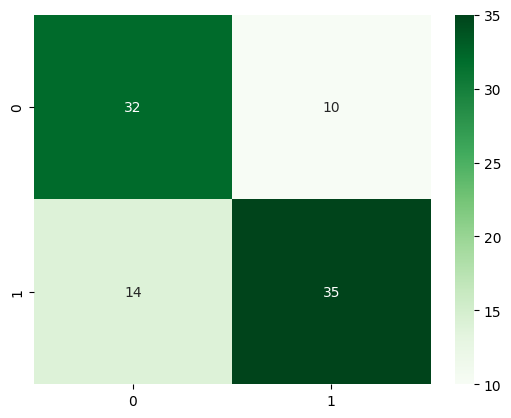

In [ ]:
sns.heatmap(cm,cmap="Greens",annot=True)

In [ ]:
depth=[1,2,3,4,5,6,7,8,9,10]

In [ ]:
for i in depth:
    dt_model=DecisionTreeClassifier(max_depth=i,random_state=1213)
    dt_model.fit(x_train,y_train)
    pred=dt_model.predict(x_test)
    print("with the tree depth",i,"the accuracy is",accuracy_score(y_test,pred))

with the tree depth 1 the accuracy is 0.7802197802197802
with the tree depth 2 the accuracy is 0.7032967032967034
with the tree depth 3 the accuracy is 0.7582417582417582
with the tree depth 4 the accuracy is 0.7582417582417582
with the tree depth 5 the accuracy is 0.7472527472527473
with the tree depth 6 the accuracy is 0.7802197802197802
with the tree depth 7 the accuracy is 0.7582417582417582
with the tree depth 8 the accuracy is 0.7802197802197802
with the tree depth 9 the accuracy is 0.7802197802197802
with the tree depth 10 the accuracy is 0.7802197802197802


In [ ]:
# best depth is 6

In [ ]:
dt_model=DecisionTreeClassifier(max_depth=6,random_state=1213)


In [ ]:
# Training the model
dt_model.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=6, random_state=1213)

In [ ]:
# Testing model
y_pred=dt_model.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0])

In [ ]:
accuracy_score(y_test,y_pred)

0.7802197802197802

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[33,  9],
       [11, 38]])

<Axes: >

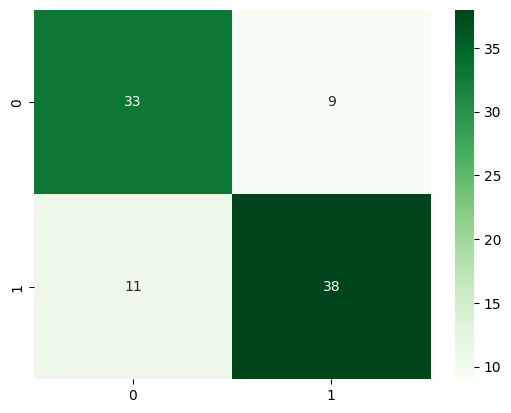

In [ ]:
sns.heatmap(cm,cmap="Greens",annot=True)

In [ ]:
# Visualizing the decision Tree

In [ ]:
from sklearn.tree import plot_tree

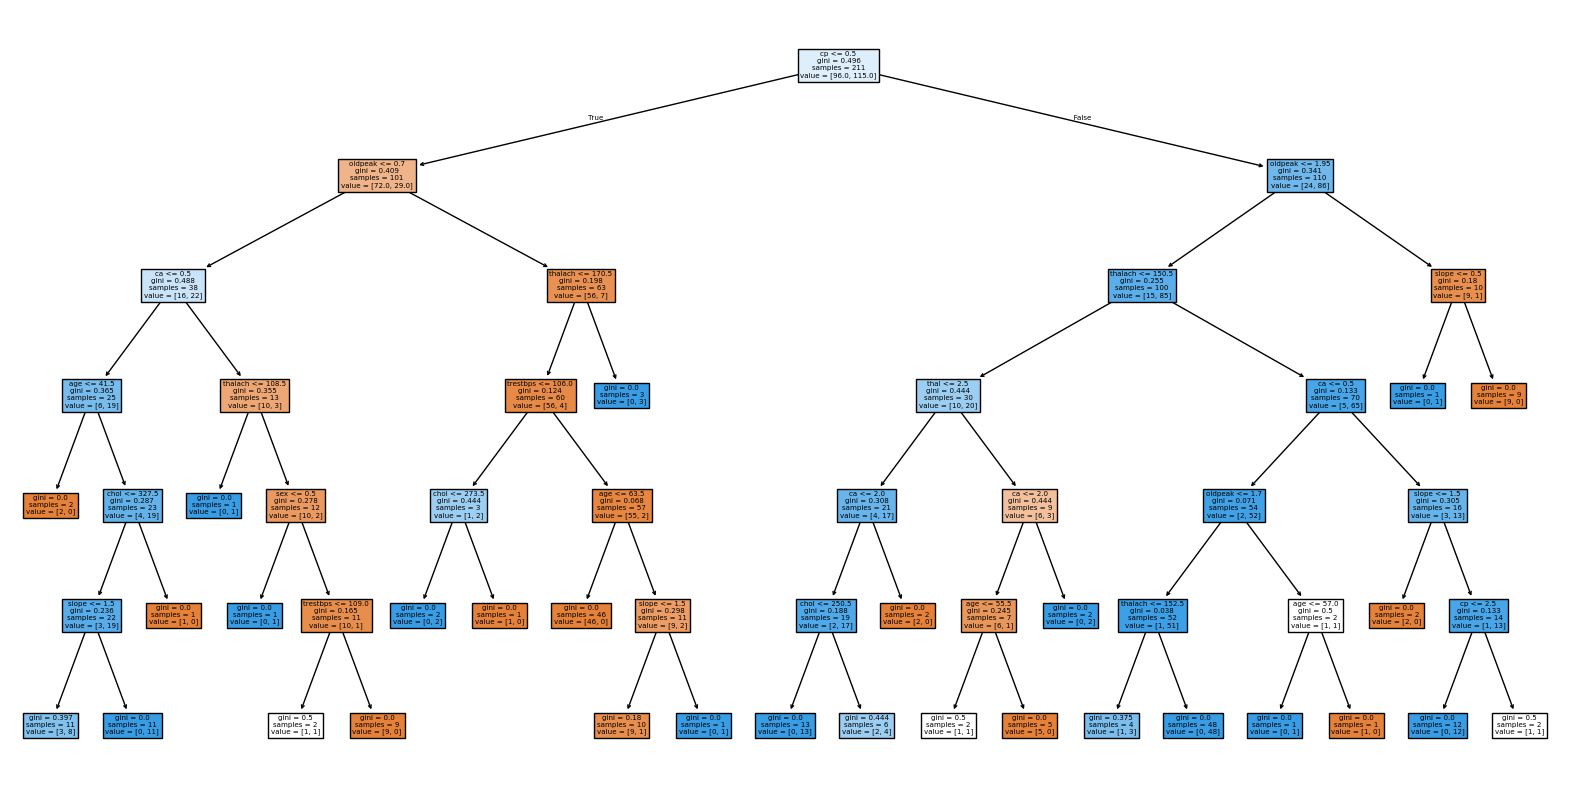

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dt_model,filled=True,feature_names=X.columns)
plt.show()